In [ ]:
import numpy as np
import pandas as pd
import joblib
df=joblib.load('../data/raw/data.pkl')

In [ ]:
import joblib
label_encoder=joblib.load('../data/processed/text/label_encoder.pkl')
target=label_encoder.transform(df['genre'])

In [ ]:
import numpy as np
import cv2
import numpy as np
from PIL import Image

def preprocess_image(image, target_size=(224, 224)):
    if isinstance(image, Image.Image):
        image = np.array(image)
    elif isinstance(image, (list, np.ndarray)):
        image = np.array(image)
    else:
        raise ValueError(f"Unsupported image type: {type(image)}")

    resized = cv2.resize(image, target_size)
    normalized = resized/ 255.0

    return normalized

In [ ]:
processed=df['image'].apply(preprocess_image)

In [ ]:

X = np.stack(processed.values)
print(X.shape)
print(X.dtype)

(1325, 224, 224, 3)
float64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

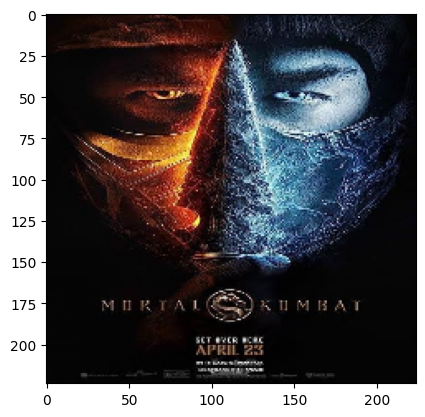

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(processed[0])

# Basic CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer

def build_basic_cnn(input_shape=(224,224,3), num_classes=4):
    model = Sequential([
        InputLayer(input_shape=input_shape),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

basic_cnn = build_basic_cnn()
basic_cnn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 394272)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      25,233,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,234,628 (96.26 MB)

 Trainable params: 25,234,628 (96.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
basic_cnn.fit(X_train,y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred=basic_cnn.predict(X_test)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 218ms/step - accuracy: 0.3320 - loss: 6.7533 - val_accuracy: 0.4481 - val_loss: 1.3185
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6041 - loss: 0.9392 - val_accuracy: 0.5047 - val_loss: 1.3474
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8045 - loss: 0.6310 - val_accuracy: 0.4623 - val_loss: 1.3569
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9205 - loss: 0.3352 - val_accuracy: 0.4764 - val_loss: 1.4801
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9510 - loss: 0.2282 - val_accuracy: 0.4575 - val_loss: 1.8157
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9503 - loss: 0.1886 - val_accuracy: 0.4057 - val_loss: 1.7499
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9747 - loss: 0.1708 - val_accuracy: 0.4764 - val_loss: 1.6574
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9575 - loss: 0.1394 - val_accuracy: 0.4811 -

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("accuracy_score:",accuracy_score(y_test, y_pred.argmax(axis=1)))
print("precision_score:",precision_score(y_test, y_pred.argmax(axis=1),average='weighted'))
print("recall_score:",recall_score(y_test, y_pred.argmax(axis=1),average='weighted'))
print("f1_score:",f1_score(y_test, y_pred.argmax(axis=1),average='weighted'))

accuracy_score: 0.43018867924528303
precision_score: 0.4311152715263719
recall_score: 0.43018867924528303
f1_score: 0.4258096928546751


# Intermediate CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer

def build_intermediate_cnn(input_shape=(224,224,3), num_classes=4):
    model = Sequential([
        InputLayer(input_shape=input_shape),
        Conv2D(32, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

intermediate_cnn = build_intermediate_cnn()
intermediate_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,939,844 (49.36 MB)

 Trainable params: 12,939,396 (49.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
intermediate_cnn.fit(X_train,y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred=intermediate_cnn.predict(X_test)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 436ms/step - accuracy: 0.3511 - loss: 16.5665 - val_accuracy: 0.2028 - val_loss: 9.5113
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.3876 - loss: 3.4449 - val_accuracy: 0.2170 - val_loss: 25.2329
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.4307 - loss: 1.3480 - val_accuracy: 0.2170 - val_loss: 16.2823
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.3909 - loss: 1.2635 - val_accuracy: 0.3208 - val_loss: 6.5488
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.4302 - loss: 1.2688 - val_accuracy: 0.3821 - val_loss: 8.9216
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.4908 - loss: 1.2133 - val_accuracy: 0.3302 - val_loss: 13.5230
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.4753 - loss: 1.1090 - val_accuracy: 0.3302 - val_loss: 8.9480
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5068 - loss: 1.0865 - val_accuracy: 0.30

In [ ]:
print("accuracy_score:",accuracy_score(y_test, y_pred.argmax(axis=1)))
print("precision_score:",precision_score(y_test, y_pred.argmax(axis=1),average='weighted'))
print("recall_score:",recall_score(y_test, y_pred.argmax(axis=1),average='weighted'))
print("f1_score:",f1_score(y_test, y_pred.argmax(axis=1),average='weighted'))

accuracy_score: 0.49056603773584906
precision_score: 0.47849786937275474
recall_score: 0.49056603773584906
f1_score: 0.4612700763803434


# Advanced CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model

def build_advanced_cnn(input_shape=(224,224,3), num_classes=4):
    inputs = Input(shape=input_shape)

    # Block 1
    x = Conv2D(32, (3,3), padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)

    # Block 2
    x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)

    # Block 3
    x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3,3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

advanced_cnn = build_advanced_cnn()
advanced_cnn.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          33,0

 Total params: 322,852 (1.23 MB)

 Trainable params: 321,956 (1.23 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
advanced_cnn.fit(X_train,y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred=advanced_cnn.predict(X_test)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 34s 620ms/step - accuracy: 0.4008 - loss: 1.3567 - val_accuracy: 0.2217 - val_loss: 1.3883
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 16s 137ms/step - accuracy: 0.4714 - loss: 1.1653 - val_accuracy: 0.2311 - val_loss: 1.6092
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.4787 - loss: 1.1693 - val_accuracy: 0.2170 - val_loss: 2.3335
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.5308 - loss: 1.1220 - val_accuracy: 0.2264 - val_loss: 1.5601
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.5061 - loss: 1.1398 - val_accuracy: 0.2170 - val_loss: 2.2040
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.5532 - loss: 1.0596 - val_accuracy: 0.4151 - val_loss: 1.7133
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.5101 - loss: 1.0606 - val_accuracy: 0.3443 - val_loss: 1.9140
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.5092 - loss: 1.1092 - val_accuracy: 

In [ ]:
print("accuracy_score:",accuracy_score(y_test, y_pred.argmax(axis=1)))
print("precision_score:",precision_score(y_test, y_pred.argmax(axis=1),average='weighted'))
print("recall_score:",recall_score(y_test, y_pred.argmax(axis=1),average='weighted'))
print("f1_score:",f1_score(y_test, y_pred.argmax(axis=1),average='weighted'))

accuracy_score: 0.36981132075471695
precision_score: 0.18544173089260135
recall_score: 0.36981132075471695
f1_score: 0.24693280093301836


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# ResNet50

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model

def build_pretrained_model(input_shape=(224,224,3), num_classes=4):
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = False  # Freeze the pretrained layers

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

pretrained_model = build_pretrained_model()
pretrained_model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
pretrained_model.fit(X_train,y_train, epochs=10, batch_size=32, validation_split=0.2)
y_pred=pretrained_model.predict(X_test)

Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 29s 605ms/step - accuracy: 0.2697 - loss: 1.6428 - val_accuracy: 0.3821 - val_loss: 1.3106
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.3653 - loss: 1.3266 - val_accuracy: 0.3774 - val_loss: 1.3006
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.3999 - loss: 1.2823 - val_accuracy: 0.4575 - val_loss: 1.2788
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.4123 - loss: 1.2766 - val_accuracy: 0.4340 - val_loss: 1.2668
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.4236 - loss: 1.2293 - val_accuracy: 0.3679 - val_loss: 1.2792
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.3951 - loss: 1.2752 - val_accuracy: 0.4434 - val_loss: 1.2689
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.4222 - loss: 1.2411 - val_accuracy: 0.4481 - val_loss: 1.2652
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.4328 - loss: 1.2258 - val_accuracy: 

In [ ]:
print("accuracy_score:",accuracy_score(y_test, y_pred.argmax(axis=1)))
print("precision_score:",precision_score(y_test, y_pred.argmax(axis=1),average='weighted'))
print("recall_score:",recall_score(y_test, y_pred.argmax(axis=1),average='weighted'))
print("f1_score:",f1_score(y_test, y_pred.argmax(axis=1),average='weighted'))

accuracy_score: 0.42641509433962266
precision_score: 0.35018283603189265
recall_score: 0.42641509433962266
f1_score: 0.3636285608583056


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Attention Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Reshape

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1]),
                                 initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(input_shape[-1],),
                                 initializer="zeros", trainable=True)
        self.u = self.add_weight(shape=(input_shape[-1], 1),
                                 initializer="random_normal", trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        # inputs: (batch_size, time_steps, features)
        v = tf.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        vu = tf.tensordot(v, self.u, axes=1)
        alphas = tf.nn.softmax(vu, axis=1)
        output = tf.reduce_sum(inputs * alphas, axis=1)
        return output

def build_attention_cnn(input_shape=(224,224,3), num_classes=4):
    inputs = tf.keras.Input(shape=input_shape)
    x = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2,2))(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2,2))(x)
    
    shape = tf.keras.backend.int_shape(x)
    x = Reshape((shape[1]*shape[2], shape[3]))(x)
    x = AttentionLayer()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

attention_cnn = build_attention_cnn()
attention_cnn.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 3136, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_layer (AttentionLayer)     │ (None, 64)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,452 (126.77 KB)

 Trainable params: 32,452 (126.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
attention_cnn.fit(X_train,y_train, epochs=50, batch_size=32, validation_split=0.2)
y_pred=attention_cnn.predict(X_test)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.4904 - loss: 1.1057 - val_accuracy: 0.4434 - val_loss: 1.2066
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.4490 - loss: 1.1687 - val_accuracy: 0.4811 - val_loss: 1.2004
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.4698 - loss: 1.1581 - val_accuracy: 0.4906 - val_loss: 1.1930
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.4816 - loss: 1.1169 - val_accuracy: 0.4858 - val_loss: 1.1955
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.4641 - loss: 1.1532 - val_accuracy: 0.4764 - val_loss: 1.1907
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.4630 - loss: 1.1243 - val_accuracy: 0.4764 - val_loss: 1.1827
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.4944 - loss: 1.1282 - val_accuracy: 0.4575 - val_loss: 1.1937
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.4985 - loss: 1.1337 - val_accuracy: 0.4575 - v

In [ ]:
print("accuracy_score:",accuracy_score(y_test, y_pred.argmax(axis=1)))
print("precision_score:",precision_score(y_test, y_pred.argmax(axis=1),average='weighted'))
print("recall_score:",recall_score(y_test, y_pred.argmax(axis=1),average='weighted'))
print("f1_score:",f1_score(y_test, y_pred.argmax(axis=1),average='weighted'))

accuracy_score: 0.5358490566037736
precision_score: 0.5587291939112914
recall_score: 0.5358490566037736
f1_score: 0.5420734350189006


# Augmentation And MobileNetV2 Model

In [ ]:
import tensorflow as tf
augmenter = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomBrightness(0.1)
])

In [ ]:
def build_simple_model():
    base = tf.keras.applications.MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_shape=(224, 224, 3)
    )
    base.trainable = False

    model = tf.keras.Sequential([
        tf.keras.Input(shape=(224, 224, 3)),
        augmenter,
        base,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu',
                            kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
class_counts = [337, 321, 269, 398]  # action, comedy, romance, horror
total = sum(class_counts)
class_weights = {
    0: (1 - 337/total) ** 2,  # action
    1: (1 - 321/total) ** 2,  # comedy
    2: (1 - 269/total) ** 2,  # romance
    3: (1 - 398/total) ** 2   # horror
}
print(class_weights)

{0: 0.5560093983624065, 1: 0.5741636169455322, 2: 0.6351789248843005, 3: 0.489471840512638}


In [ ]:
model = build_simple_model()
early_stop = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop]
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 16s 173ms/step - accuracy: 0.2527 - loss: 3.0319 - val_accuracy: 0.3208 - val_loss: 2.7468
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.3291 - loss: 1.9179 - val_accuracy: 0.3849 - val_loss: 2.1017
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.3034 - loss: 1.4966 - val_accuracy: 0.4377 - val_loss: 1.8016
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.3589 - loss: 1.2607 - val_accuracy: 0.3434 - val_loss: 1.7687
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.3531 - loss: 1.1395 - val_accuracy: 0.3660 - val_loss: 1.6426
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.3139 - loss: 1.0757 - val_accuracy: 0.2943 - val_loss: 1.7435
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.3319 - loss: 1.0085 - val_accuracy: 0.4679 - val_loss: 1.4832
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step -

In [ ]:
y_pred=model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred.argmax(axis=1)))

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 303ms/step
              precision    recall  f1-score   support

           0       0.49      0.56      0.52        63
           1       0.53      0.61      0.57        71
           2       0.55      0.79      0.65        78
           3       0.00      0.00      0.00        53

    accuracy                           0.53       265
   macro avg       0.39      0.49      0.43       265
weighted avg       0.42      0.53      0.47       265



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 4 Layer CNN and MaxPooling

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D, BatchNormalization, Dropout, GlobalMaxPooling2D,
    Dense, Multiply, Activation, Input, MaxPooling2D,
    GlobalAveragePooling2D, Concatenate, Flatten
)
from tensorflow.keras.models import Sequential


model = Sequential([
    Conv2D(32, (3, 3), input_shape=X_train.shape[1:], activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

new_adam = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=new_adam,
    metrics=['accuracy']
)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 629,988 (2.40 MB)

 Trainable params: 629,988 (2.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X_train,y_train, epochs=100, validation_split=0.2, batch_size=32)
y_pred=model.predict(X_test)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.6443 - loss: 0.8061 - val_accuracy: 0.4340 - val_loss: 1.6460
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.6323 - loss: 0.7606 - val_accuracy: 0.4245 - val_loss: 1.3571
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6863 - loss: 0.7124 - val_accuracy: 0.4198 - val_loss: 1.4653
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6529 - loss: 0.7051 - val_accuracy: 0.4528 - val_loss: 1.6947
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6328 - loss: 0.7610 - val_accuracy: 0.3821 - val_loss: 1.6570
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6870 - loss: 0.7054 - val_accuracy: 0.4009 - val_loss: 1.7129
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7337 - loss: 0.6132 - val_accuracy: 0.4245 - val_loss: 1.7804
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7151 - loss: 0.6427 - val_accuracy: 0.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.43      0.37      0.40        63
           1       0.45      0.51      0.48        71
           2       0.61      0.74      0.67        78
           3       0.32      0.23      0.27        53

    accuracy                           0.49       265
   macro avg       0.45      0.46      0.45       265
weighted avg       0.47      0.49      0.47       265



<Axes: xlabel='genre'>

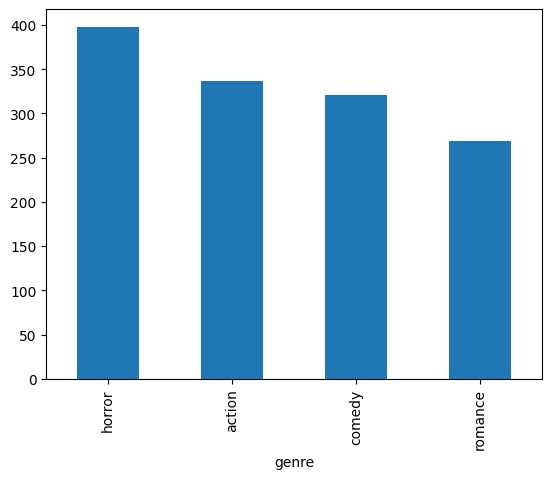

In [ ]:
df['genre'].value_counts().plot(kind='bar')

Downloaded new data using image_data.ipynb

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

def load_dataset(data_dir='../data/new_data'):
    dataset = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        label_mode='int',
        image_size=(224, 224),
        batch_size=32,
        shuffle=True
    )

    class_names = dataset.class_names
    print(f"Found {len(class_names)} classes: {class_names}")

    plt.figure(figsize=(12, 8))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
    plt.show()

    return dataset, class_names

def split_data(dataset, test_split=0.2):
    dataset_size = tf.data.experimental.cardinality(dataset).numpy()
    test_size = int(dataset_size * test_split)
    train_size = dataset_size - test_size

    train_ds = dataset.skip(test_size)
    test_ds = dataset.take(test_size)

    print(f"Training samples: {train_size * 32}")
    print(f"Test samples: {test_size * 32}")

    return train_ds, test_ds

def preprocess(dataset):
    normalization = tf.keras.layers.Rescaling(1./255)

    return dataset.map(
        lambda x, y: (normalization(x), y),
        num_parallel_calls=tf.data.AUTOTUNE
    )

def get_class_weights(dataset):
    class_counts = np.zeros(len(class_names))

    for images, labels in dataset.unbatch():
        class_counts[labels.numpy()] += 1

    total_samples = sum(class_counts)
    class_weights = {
        i: total_samples / (len(class_names) * count)
        for i, count in enumerate(class_counts)
    }

    print("\nClass distribution:")
    for i, name in enumerate(class_names):
        print(f"{name}: {class_counts[i]} samples (weight: {class_weights[i]:.2f})")

    return class_weights

Found 4000 files belonging to 4 classes.
Found 4 classes: ['action', 'comedy', 'horror', 'romance']


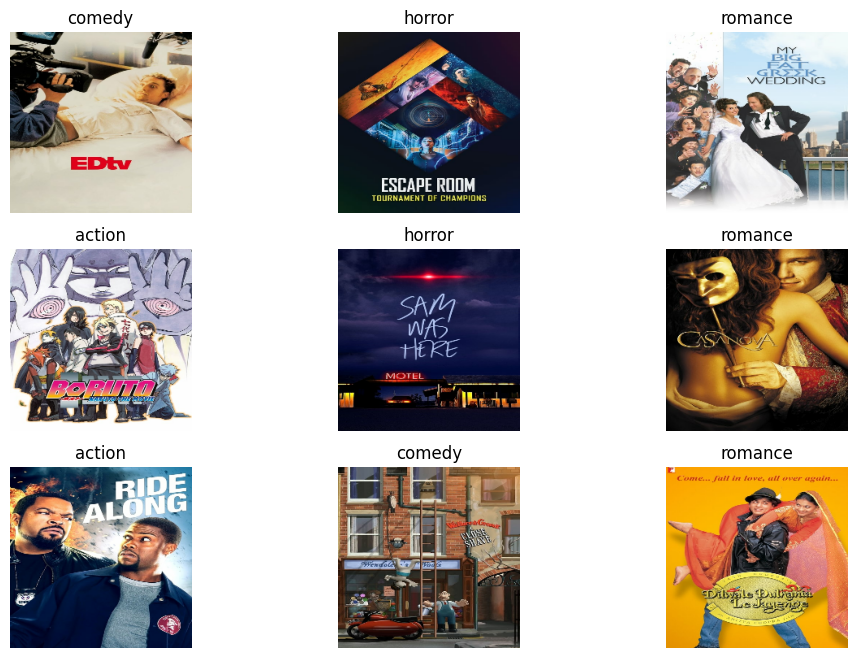

In [ ]:
dataset,class_names=load_dataset()

In [ ]:
class_names

['action', 'comedy', 'horror', 'romance']

In [ ]:
train_ds, test_ds = split_data(dataset)

Training samples: 3200
Test samples: 800


In [ ]:
train_ds = preprocess(train_ds).cache().prefetch(tf.data.AUTOTUNE)
test_ds = preprocess(test_ds).cache().prefetch(tf.data.AUTOTUNE)

In [ ]:
class_weights = get_class_weights(dataset)


Class distribution:
action: 1000.0 samples (weight: 1.00)
comedy: 1000.0 samples (weight: 1.00)
horror: 1000.0 samples (weight: 1.00)
romance: 1000.0 samples (weight: 1.00)


# CNN Model

In [ ]:
def build_train_model(train_ds, test_ds, class_weights):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        train_ds,
        validation_data=test_ds,
        epochs=100,
        class_weight=class_weights,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(patience=5),
            tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
        ]
    )

    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return model

In [ ]:
model = build_train_model(train_ds, test_ds, class_weights)

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print(f"\nFinal Test Accuracy: {accuracy:.2%}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4027 - loss: 1.3377

Final Test Accuracy: 42.25%


# ResNet50 Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications

def build_resnet_model(input_shape=(224, 224, 3), num_classes=4):
    base_model = applications.ResNet50(
        include_top=False,
        weights="imagenet",
        input_shape=input_shape
    )

    base_model.trainable = False

    inputs = layers.Input(shape=input_shape)
    x = layers.RandomFlip("horizontal")(inputs)
    x = layers.RandomRotation(0.1)(x)
    x = layers.RandomContrast(0.2)(x)
    x = layers.RandomZoom(0.2)(x)
    x = applications.resnet.preprocess_input(x)
    x = base_model(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model, base_model

def train_model(train_ds, val_ds, class_weights):
    model, base_model = build_resnet_model()

    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True)
    ]

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=10,
        class_weight=class_weights,
        callbacks=callbacks
    )

    # Fine-tune deeper layers
    base_model.trainable = True
    for layer in base_model.layers[:100]: 
        layer.trainable = False

    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-5),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=10,
        initial_epoch=history.epoch[-1],
        class_weight=class_weights,
        callbacks=callbacks
    )

    return model


In [ ]:
from sklearn.metrics import classification_report
train_ds, test_ds = split_data(dataset)

train_ds = preprocess(train_ds).prefetch(tf.data.AUTOTUNE)
test_ds = preprocess(test_ds).prefetch(tf.data.AUTOTUNE)

model = train_model(train_ds, test_ds, class_weights)

def TTA_predict(model, dataset, n=5):
    probs = []
    for _ in range(n):
        probs.append(model.predict(dataset))
    return np.mean(probs, axis=0)

y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_probs = TTA_predict(model, test_ds)
y_pred = np.argmax(y_probs, axis=1)

print("\nEnhanced Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Training samples: 3200
Test samples: 800
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 278ms/step - accuracy: 0.2567 - loss: 5.5691 - val_accuracy: 0.3438 - val_loss: 3.9806
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 264ms/step - accuracy: 0.2908 - loss: 3.7237 - val_accuracy: 0.3225 - val_loss: 2.8564
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 253ms/step - accuracy: 0.3352 - loss: 2.6971 - val_accuracy: 0.3400 - val_loss: 2.2229
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 263ms/step - accuracy: 0.3445 - loss: 2.1328 - val_accuracy: 0.3675 - val_loss: 1.8700
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 263ms/step - accuracy: 0.3359 - loss: 1.8317 - val_accuracy: 0.3625 - val_loss: 1.6836
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 283ms/step - accuracy: 0.3357 - loss: 1.6613 - val_accuracy: 0.3425 - val_loss: 1.5897
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 261ms/step - accuracy: 0.3369 - loss: 1.5740 - val_accuracy: 0.3625 - val_loss

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
loss, accuracy = model.evaluate(test_ds)
print(f"\nFinal Test Accuracy: {accuracy:.2%}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 238ms/step - accuracy: 0.2494 - loss: 1.5504

Final Test Accuracy: 26.25%


# EfficientNetB0

Found 4000 files belonging to 4 classes.
Found 4 classes: ['action', 'comedy', 'horror', 'romance']


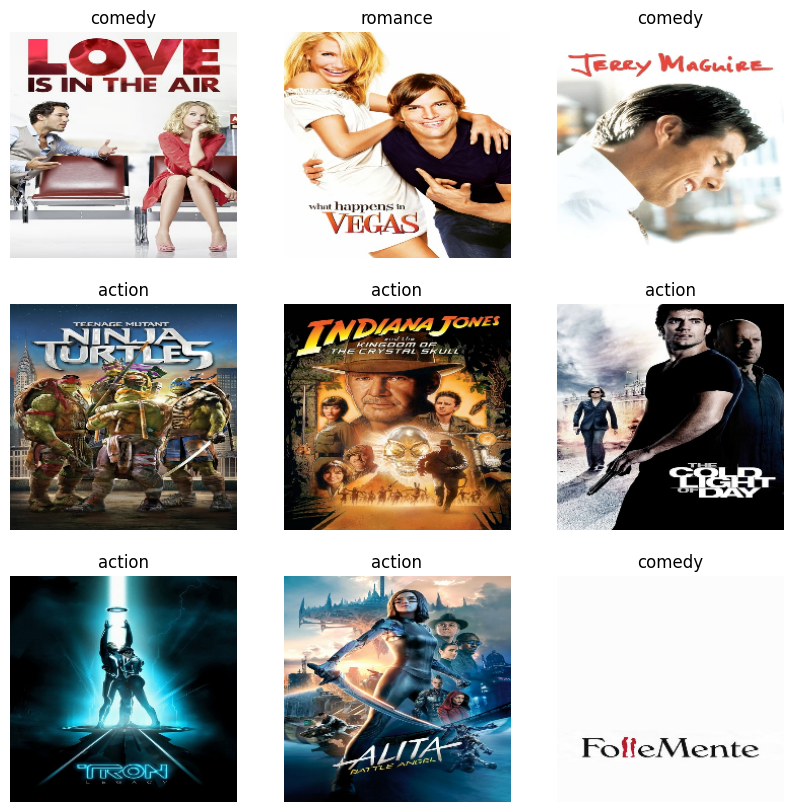

Sample batch shape: (32, 224, 224, 3) Labels shape: (32,)
Training batches: 100
Validation batches: 25
Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.3066 - loss: 5.6021

100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 298ms/step - accuracy: 0.3072 - loss: 5.6000 - val_accuracy: 0.5275 - val_loss: 4.9318
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.4866 - loss: 4.8573

100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 264ms/step - accuracy: 0.4868 - loss: 4.8561 - val_accuracy: 0.5487 - val_loss: 4.4555
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.5385 - loss: 4.3723

100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 264ms/step - accuracy: 0.5386 - loss: 4.3712 - val_accuracy: 0.5537 - val_loss: 4.0787
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.5526 - loss: 4.0003

100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.5527 - loss: 3.9993 - val_accuracy: 0.5800 - val_loss: 3.7291
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.5677 - loss: 3.6533

100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 259ms/step - accuracy: 0.5679 - loss: 3.6525 - val_accuracy: 0.5925 - val_loss: 3.4314
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.5943 - loss: 3.3551

100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 254ms/step - accuracy: 0.5944 - loss: 3.3545 - val_accuracy: 0.6025 - val_loss: 3.1922
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.5986 - loss: 3.1413

100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 255ms/step - accuracy: 0.5988 - loss: 3.1404 - val_accuracy: 0.5850 - val_loss: 2.9798
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.6065 - loss: 2.9012

100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 305ms/step - accuracy: 0.6066 - loss: 2.9006 - val_accuracy: 0.5838 - val_loss: 2.7868
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.6425 - loss: 2.6795

100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 245ms/step - accuracy: 0.6425 - loss: 2.6790 - val_accuracy: 0.5775 - val_loss: 2.6293
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.6291 - loss: 2.5294

100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 253ms/step - accuracy: 0.6293 - loss: 2.5288 - val_accuracy: 0.5788 - val_loss: 2.4820
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.6363 - loss: 2.3688

100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 261ms/step - accuracy: 0.6365 - loss: 2.3682 - val_accuracy: 0.5987 - val_loss: 2.3548
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.6447 - loss: 2.2367

100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 257ms/step - accuracy: 0.6448 - loss: 2.2362 - val_accuracy: 0.5813 - val_loss: 2.2499
Epoch 13/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.6481 - loss: 2.1186

100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 256ms/step - accuracy: 0.6483 - loss: 2.1181 - val_accuracy: 0.5938 - val_loss: 2.1192
Epoch 14/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.6555 - loss: 1.9972

100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 254ms/step - accuracy: 0.6556 - loss: 1.9968 - val_accuracy: 0.5725 - val_loss: 2.0423
Epoch 15/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.6438 - loss: 1.9295

100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 259ms/step - accuracy: 0.6440 - loss: 1.9289 - val_accuracy: 0.5913 - val_loss: 1.9587
Epoch 16/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.6581 - loss: 1.8167

100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 241ms/step - accuracy: 0.6583 - loss: 1.8162 - val_accuracy: 0.5900 - val_loss: 1.8785
Epoch 17/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.6690 - loss: 1.7331

100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 259ms/step - accuracy: 0.6691 - loss: 1.7327 - val_accuracy: 0.5813 - val_loss: 1.8490
Epoch 18/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.6670 - loss: 1.6695

100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 255ms/step - accuracy: 0.6672 - loss: 1.6690 - val_accuracy: 0.6037 - val_loss: 1.7487
Epoch 19/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.6776 - loss: 1.6037

100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 252ms/step - accuracy: 0.6778 - loss: 1.6032 - val_accuracy: 0.5950 - val_loss: 1.7073
Epoch 20/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.6992 - loss: 1.5237

100/100 ━━━━━━━━━━━━━━━━━━━━ 30s 262ms/step - accuracy: 0.6993 - loss: 1.5234 - val_accuracy: 0.5925 - val_loss: 1.6649
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.5865 - loss: 1.6472
Validation Loss: 1.6561002731323242
Validation Accuracy: 0.5862500071525574
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121

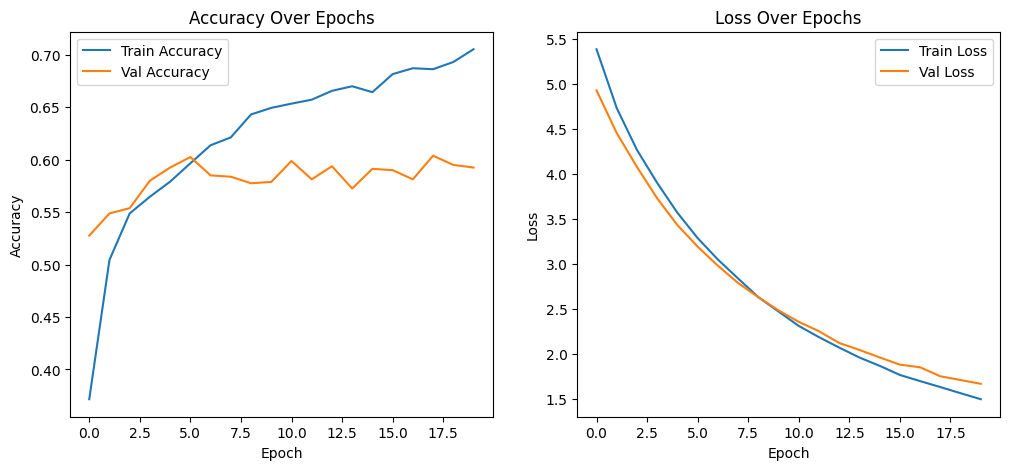

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

def load_dataset(data_dir, img_size=(224, 224), batch_size=32):
    dataset = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        label_mode='int',
        image_size=img_size,
        batch_size=batch_size,
        shuffle=True
    )
    class_names = dataset.class_names
    print(f"Found {len(class_names)} classes: {class_names}")

    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(min(9, images.shape[0])):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
    plt.show()

    for images, labels in dataset.take(1):
        print("Sample batch shape:", images.shape, "Labels shape:", labels.shape)

    return dataset, class_names

def split_dataset(dataset, test_split=0.2):
    total_batches = tf.data.experimental.cardinality(dataset).numpy()
    test_batches = int(total_batches * test_split)
    train_ds = dataset.skip(test_batches)
    val_ds = dataset.take(test_batches)
    print("Training batches:", tf.data.experimental.cardinality(train_ds).numpy())
    print("Validation batches:", tf.data.experimental.cardinality(val_ds).numpy())
    return train_ds, val_ds

def preprocess_images(x, y):
    x = tf.cast(x, tf.float32)
    x = tf.keras.applications.efficientnet.preprocess_input(x)
    return x, y

def build_efficientnet_model(input_shape=(224, 224, 3), num_classes=4):
    base_model = tf.keras.applications.EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )
    base_model.trainable = False  # Freeze the base model for initial training

    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(256, activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)
    return model

def compile_model(model, initial_lr=1e-4):
    optimizer = tf.keras.optimizers.Adam(learning_rate=initial_lr)
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

def train_model(model, train_ds, val_ds, epochs=20, class_weights=None):
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint('best_efficientnet_model.h5', save_best_only=True)
    ]
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
        class_weight=class_weights,
        callbacks=callbacks
    )
    return history

def evaluate_model(model, val_ds, class_names):
    loss, accuracy = model.evaluate(val_ds)
    print("Validation Loss:", loss)
    print("Validation Accuracy:", accuracy)

    y_true = []
    y_pred = []
    for images, labels in val_ds:
        preds = model.predict(images)
        preds_classes = np.argmax(preds, axis=1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds_classes)

    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names))

def plot_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Val Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Accuracy Over Epochs")

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss Over Epochs")
    plt.show()

if __name__ == '__main__':
    DATA_DIR = '../data/new_data'
    IMG_SIZE = (224, 224)
    BATCH_SIZE = 32
    EPOCHS = 20

    dataset, class_names = load_dataset(DATA_DIR, img_size=IMG_SIZE, batch_size=BATCH_SIZE)

    train_ds, val_ds = split_dataset(dataset, test_split=0.2)

    train_ds = train_ds.map(preprocess_images, num_parallel_calls=tf.data.AUTOTUNE)
    val_ds = val_ds.map(preprocess_images, num_parallel_calls=tf.data.AUTOTUNE)

    train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
    val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

    model = build_efficientnet_model(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3), num_classes=len(class_names))

    compile_model(model, initial_lr=1e-4)

    class_weights = None

    history = train_model(model, train_ds, val_ds, epochs=EPOCHS, class_weights=class_weights)

    evaluate_model(model, val_ds, class_names)

    plot_history(history)

# EfficientNetB3 Model with Two Phase Training and Augmentation

1 GPU(s) detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Found 4000 files belonging to 4 classes.
Found 4 classes: ['action', 'comedy', 'horror', 'romance']


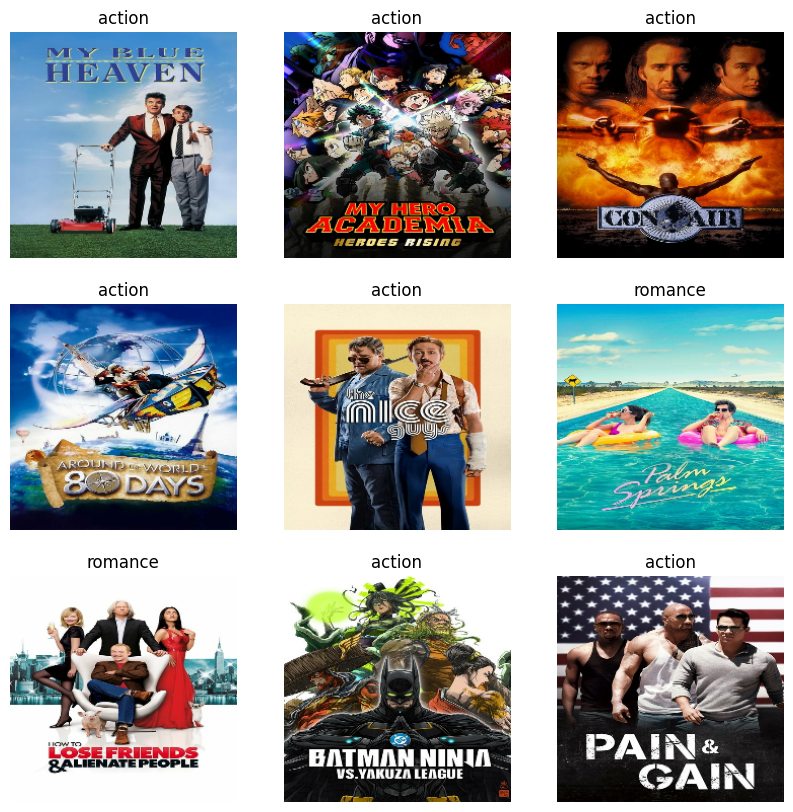

Training batches: 100
Validation batches: 25
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Starting Phase 1 Training (frozen base model)...
Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4015 - loss: 1.2994

100/100 ━━━━━━━━━━━━━━━━━━━━ 398s 3s/step - accuracy: 0.4020 - loss: 1.2986 - val_accuracy: 0.5537 - val_loss: 1.0341
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.5309 - loss: 1.0808

100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 328ms/step - accuracy: 0.5309 - loss: 1.0808 - val_accuracy: 0.5625 - val_loss: 1.0214
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.5320 - loss: 1.0689

100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 283ms/step - accuracy: 0.5322 - loss: 1.0688 - val_accuracy: 0.5713 - val_loss: 1.0075
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.5476 - loss: 1.0278

100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 284ms/step - accuracy: 0.5477 - loss: 1.0277 - val_accuracy: 0.5763 - val_loss: 0.9799
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.5488 - loss: 1.0307

100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 283ms/step - accuracy: 0.5489 - loss: 1.0305 - val_accuracy: 0.5713 - val_loss: 0.9759
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 261ms/step - accuracy: 0.5601 - loss: 0.9881 - val_accuracy: 0.5675 - val_loss: 1.0059
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.5733 - loss: 0.9990

100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 275ms/step - accuracy: 0.5735 - loss: 0.9987 - val_accuracy: 0.6050 - val_loss: 0.9699
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 307ms/step - accuracy: 0.6092 - loss: 0.9344 - val_accuracy: 0.5738 - val_loss: 1.0126
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 279ms/step - accuracy: 0.5978 - loss: 0.9263 - val_accuracy: 0.5575 - val_loss: 1.0189
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 274ms/step - accuracy: 0.6011 - loss: 0.9289 - val_accuracy: 0.5550 - val_loss: 1.0197
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 273ms/step - accuracy: 0.6127 - loss: 0.9104 - val_accuracy: 0.5575 - val_loss: 1.0109
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 269ms/step - accuracy: 0.6196 - loss: 0.9060 - val_accuracy: 0.5638 - val_loss: 1.0208
Starting Phase 2 Fine-tuning (unfrozen top layers)...
Epoch 21/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 322ms/step - accuracy: 0.5296 - loss: 1.0909 - val_accuracy: 0.5775 - val_loss: 0.9821
Epoch 22/30
100/100 ━━━━━━━━━━━━━━━━

100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 306ms/step - accuracy: 0.6208 - loss: 0.8800 - val_accuracy: 0.5900 - val_loss: 0.9632
Epoch 24/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.6504 - loss: 0.8465

100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 303ms/step - accuracy: 0.6505 - loss: 0.8462 - val_accuracy: 0.6162 - val_loss: 0.9601
Epoch 25/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.6726 - loss: 0.7966

100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 369ms/step - accuracy: 0.6727 - loss: 0.7963 - val_accuracy: 0.6162 - val_loss: 0.9432
Epoch 26/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 287ms/step - accuracy: 0.6975 - loss: 0.7556 - val_accuracy: 0.6125 - val_loss: 0.9856
Epoch 27/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 280ms/step - accuracy: 0.7215 - loss: 0.7017 - val_accuracy: 0.6150 - val_loss: 0.9729
Epoch 28/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 285ms/step - accuracy: 0.7195 - loss: 0.6870 - val_accuracy: 0.6112 - val_loss: 1.0101
Epoch 29/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 289ms/step - accuracy: 0.7273 - loss: 0.6802 - val_accuracy: 0.6150 - val_loss: 0.9879
Epoch 30/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 333ms/step - accuracy: 0.7384 - loss: 0.6643 - val_accuracy: 0.5913 - val_loss: 1.0688
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - accuracy: 0.5806 - loss: 0.9753
Validation Loss: 0.9647952914237976
Validation Accuracy: 0.6050000190734863
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms

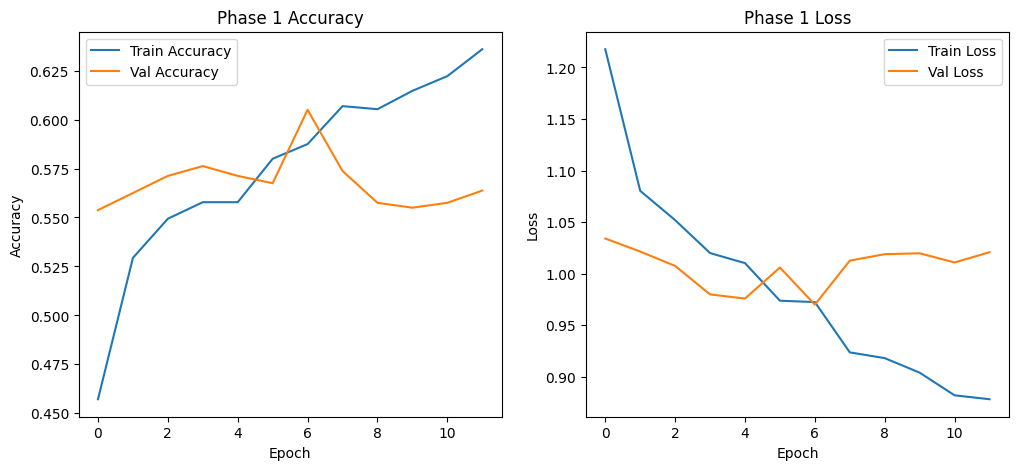

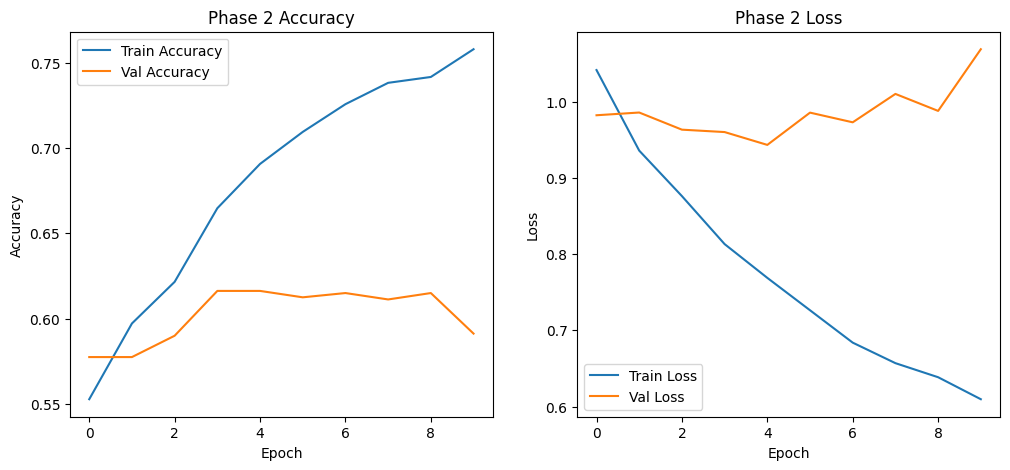

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"{len(gpus)} GPU(s) detected: {gpus}")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU detected.")

def load_and_split_dataset(data_dir, img_size=(224,224), batch_size=32, test_split=0.2):
    dataset = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        label_mode='int',
        image_size=img_size,
        batch_size=batch_size,
        shuffle=True
    )
    class_names = dataset.class_names
    print(f"Found {len(class_names)} classes: {class_names}")

    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(min(9, images.shape[0])):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
    plt.show()

    total_batches = tf.data.experimental.cardinality(dataset).numpy()
    test_batches = int(total_batches * test_split)
    train_ds = dataset.skip(test_batches)
    val_ds = dataset.take(test_batches)
    print("Training batches:", tf.data.experimental.cardinality(train_ds).numpy())
    print("Validation batches:", tf.data.experimental.cardinality(val_ds).numpy())
    return train_ds, val_ds, class_names

def preprocess_images(x, y):
    """
    Preprocess images for EfficientNet:
      - Convert to float32.
      - Use EfficientNet's preprocess_input (which scales pixel values as needed).
    """
    x = tf.cast(x, tf.float32)
    x = tf.keras.applications.efficientnet.preprocess_input(x)
    return x, y

# Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2)
])

def build_model(input_shape=(224,224,3), num_classes=4):
    inputs = tf.keras.Input(shape=input_shape)

    x = data_augmentation(inputs)
    base_model = tf.keras.applications.EfficientNetB3(
        include_top=False,
        weights="imagenet",
        input_shape=input_shape
    )
    base_model.trainable = False  # Freeze base model for initial training

    x = base_model(x, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)

    model = tf.keras.Model(inputs, outputs)
    return model, base_model

def compile_model(model, learning_rate):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

# Training Function (Two-Phase Training)
def train_and_finetune(model, base_model, train_ds, val_ds, epochs_phase1=20, epochs_phase2=10):
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
    ]
    print("Starting Phase 1 Training (frozen base model)...")
    history1 = model.fit(train_ds, validation_data=val_ds, epochs=epochs_phase1, callbacks=callbacks)

    # Fine-tuning: Unfreeze last 50 layers of the base model
    base_model.trainable = True
    for layer in base_model.layers[:-50]:
        layer.trainable = False
    print("Starting Phase 2 Fine-tuning (unfrozen top layers)...")
    compile_model(model, learning_rate=1e-4)
    history2 = model.fit(train_ds, validation_data=val_ds, epochs=epochs_phase1+epochs_phase2,
                         initial_epoch=epochs_phase1, callbacks=callbacks)
    return history1, history2

def evaluate_model(model, val_ds, class_names):
    loss, accuracy = model.evaluate(val_ds)
    print("Validation Loss:", loss)
    print("Validation Accuracy:", accuracy)
    y_true = []
    y_pred = []
    for images, labels in val_ds:
        preds = model.predict(images)
        preds_classes = np.argmax(preds, axis=1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds_classes)
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names))

def plot_history(history, title_prefix=""):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Val Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title(f"{title_prefix} Accuracy")

    plt.subplot(1,2,2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"{title_prefix} Loss")
    plt.show()

if __name__ == '__main__':
    DATA_DIR = "../data/new_data"
    IMG_SIZE = (224, 224)
    BATCH_SIZE = 32
    epochs_phase1 = 20
    epochs_phase2 = 10

    train_ds, val_ds, class_names = load_and_split_dataset(DATA_DIR, img_size=IMG_SIZE, batch_size=BATCH_SIZE, test_split=0.2)

    train_ds = train_ds.map(preprocess_images, num_parallel_calls=tf.data.AUTOTUNE)
    val_ds = val_ds.map(preprocess_images, num_parallel_calls=tf.data.AUTOTUNE)
    train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
    val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

    model, base_model = build_model(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3), num_classes=len(class_names))

    compile_model(model, learning_rate=1e-3)

    history1, history2 = train_and_finetune(model, base_model, train_ds, val_ds, epochs_phase1=epochs_phase1, epochs_phase2=epochs_phase2)

    evaluate_model(model, val_ds, class_names)

    plot_history(history1, title_prefix="Phase 1")
    plot_history(history2, title_prefix="Phase 2")


# EfficientNetB5 With two phase training and augmentation

1 GPU(s) detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Found 4000 files belonging to 4 classes.
Found 4 classes: ['action', 'comedy', 'horror', 'romance']


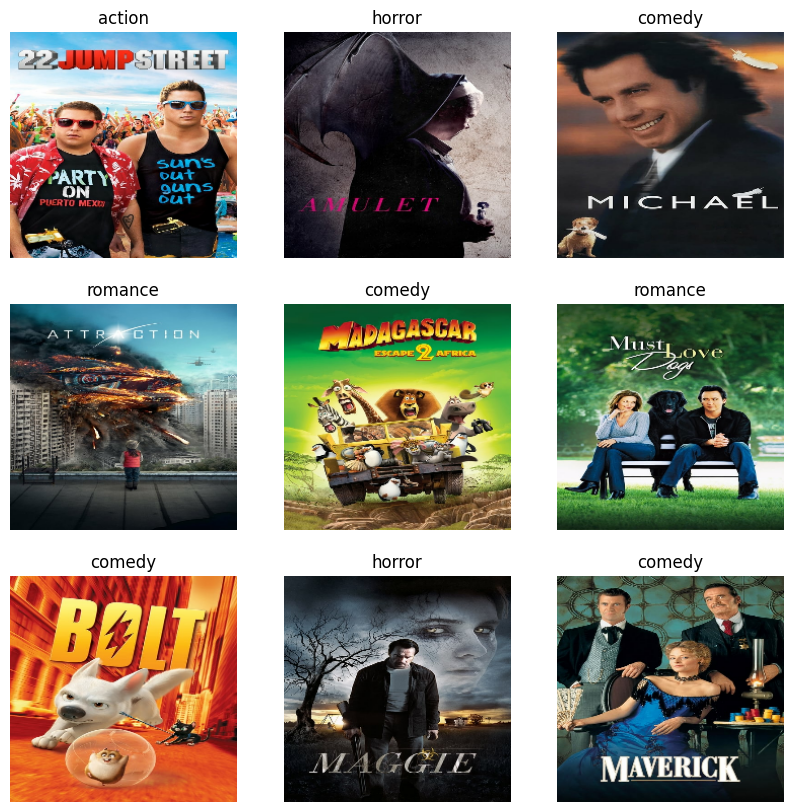

Training batches: 100
Validation batches: 25
Starting Phase 1 Training (frozen base model)...
Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.4204 - loss: 1.2434

100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 428ms/step - accuracy: 0.4209 - loss: 1.2428 - val_accuracy: 0.5462 - val_loss: 1.0676
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 320ms/step - accuracy: 0.5421 - loss: 1.0672 - val_accuracy: 0.5225 - val_loss: 1.0732
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.5535 - loss: 1.0192

100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 348ms/step - accuracy: 0.5537 - loss: 1.0190 - val_accuracy: 0.5462 - val_loss: 1.0469
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.5523 - loss: 1.0326

100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 353ms/step - accuracy: 0.5524 - loss: 1.0323 - val_accuracy: 0.5562 - val_loss: 1.0434
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 320ms/step - accuracy: 0.5891 - loss: 0.9870 - val_accuracy: 0.5250 - val_loss: 1.0650
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - accuracy: 0.5937 - loss: 0.9412 - val_accuracy: 0.5275 - val_loss: 1.0558
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 328ms/step - accuracy: 0.5874 - loss: 0.9572 - val_accuracy: 0.5225 - val_loss: 1.0799
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.6225 - loss: 0.9262

100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 352ms/step - accuracy: 0.6225 - loss: 0.9260 - val_accuracy: 0.5638 - val_loss: 1.0314
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 369ms/step - accuracy: 0.6181 - loss: 0.8897 - val_accuracy: 0.5437 - val_loss: 1.0831
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 320ms/step - accuracy: 0.6313 - loss: 0.8624 - val_accuracy: 0.5337 - val_loss: 1.0456
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 326ms/step - accuracy: 0.6123 - loss: 0.8911 - val_accuracy: 0.5450 - val_loss: 1.0430
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 328ms/step - accuracy: 0.6356 - loss: 0.8893 - val_accuracy: 0.5200 - val_loss: 1.1055
Epoch 13/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 322ms/step - accuracy: 0.6308 - loss: 0.8706 - val_accuracy: 0.5412 - val_loss: 1.0770
Starting Phase 2 Fine-tuning (unfrozen top layers)...
Epoch 21/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 88s 489ms/step - accuracy: 0.5340 - loss: 1.1227 - val_accuracy: 0.5450 - val_loss: 1.0540
Epoch 22/30
100/100 ━━━━━━━━━━━━━━━

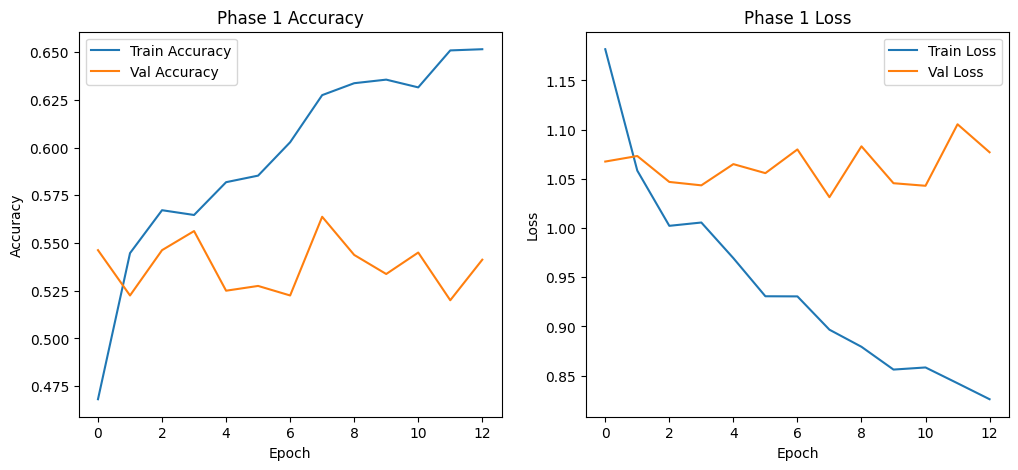

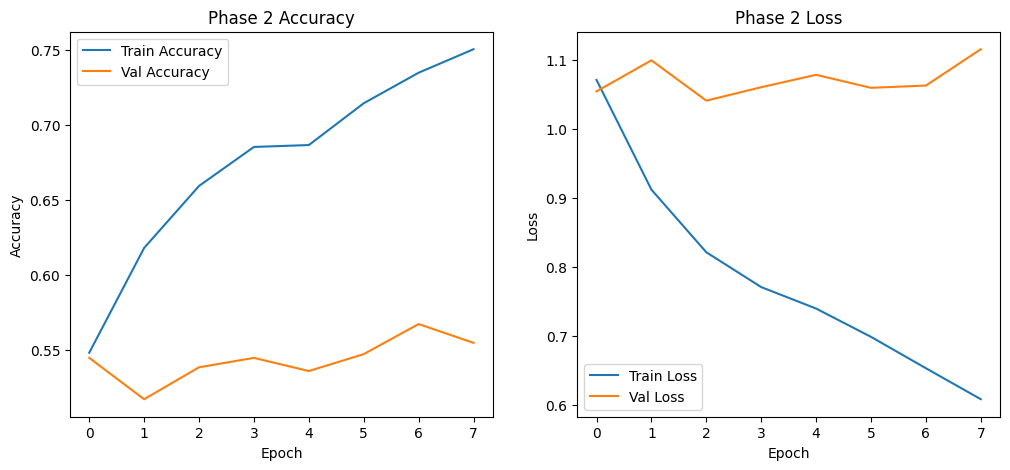

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"{len(gpus)} GPU(s) detected: {gpus}")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU detected.")

def load_and_split_dataset(data_dir, img_size=(224,224), batch_size=32, test_split=0.2):
    dataset = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        label_mode='int',
        image_size=img_size,
        batch_size=batch_size,
        shuffle=True
    )
    class_names = dataset.class_names
    print(f"Found {len(class_names)} classes: {class_names}")
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(min(9, images.shape[0])):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
    plt.show()

    total_batches = tf.data.experimental.cardinality(dataset).numpy()
    test_batches = int(total_batches * test_split)
    train_ds = dataset.skip(test_batches)
    val_ds = dataset.take(test_batches)
    print("Training batches:", tf.data.experimental.cardinality(train_ds).numpy())
    print("Validation batches:", tf.data.experimental.cardinality(val_ds).numpy())
    return train_ds, val_ds, class_names

def preprocess_images(x, y):
    x = tf.cast(x, tf.float32)
    x = tf.keras.applications.efficientnet.preprocess_input(x)
    return x, y

# Augmentation Layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2)
])

def build_model(input_shape=(224,224,3), num_classes=4):
    inputs = tf.keras.Input(shape=input_shape)

    x = data_augmentation(inputs)

    base_model = tf.keras.applications.EfficientNetB5(
        include_top=False,
        weights="imagenet",
        input_shape=input_shape
    )
    base_model.trainable = False

    x = base_model(x, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)

    model = tf.keras.Model(inputs, outputs)
    return model, base_model

def compile_model(model, learning_rate):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

# Training Function (Two-Phase Training)
def train_and_finetune(model, base_model, train_ds, val_ds, epochs_phase1=20, epochs_phase2=10):
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint('best_model_b5.h5', save_best_only=True)
    ]
    print("Starting Phase 1 Training (frozen base model)...")
    history1 = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs_phase1,
        callbacks=callbacks
    )

    # Unfreeze top layers for fine-tuning
    base_model.trainable = True
    for layer in base_model.layers[:-50]:
        layer.trainable = False
    print("Starting Phase 2 Fine-tuning (unfrozen top layers)...")

    # Recompile with a lower learning rate
    compile_model(model, learning_rate=1e-4)
    history2 = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs_phase1 + epochs_phase2,
        initial_epoch=epochs_phase1,
        callbacks=callbacks
    )
    return history1, history2

def evaluate_model(model, val_ds, class_names):
    loss, accuracy = model.evaluate(val_ds)
    print("Validation Loss:", loss)
    print("Validation Accuracy:", accuracy)

    y_true = []
    y_pred = []
    for images, labels in val_ds:
        preds = model.predict(images)
        preds_classes = np.argmax(preds, axis=1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds_classes)

    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names))

def plot_history(history, title_prefix=""):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Val Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title(f"{title_prefix} Accuracy")

    plt.subplot(1,2,2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"{title_prefix} Loss")
    plt.show()

if __name__ == '__main__':
    DATA_DIR = "../data/new_data" 
    IMG_SIZE = (224, 224)
    BATCH_SIZE = 32
    epochs_phase1 = 20
    epochs_phase2 = 10

    train_ds, val_ds, class_names = load_and_split_dataset(
        DATA_DIR,
        img_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        test_split=0.2
    )

    train_ds = train_ds.map(preprocess_images, num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
    val_ds = val_ds.map(preprocess_images, num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

    model, base_model = build_model(
        input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3),
        num_classes=len(class_names)
    )

    compile_model(model, learning_rate=1e-3)

    history1, history2 = train_and_finetune(
        model, base_model,
        train_ds, val_ds,
        epochs_phase1=epochs_phase1,
        epochs_phase2=epochs_phase2
    )

    evaluate_model(model, val_ds, class_names)

    plot_history(history1, title_prefix="Phase 1")
    plot_history(history2, title_prefix="Phase 2")


# EfficientNetB3 With mixup Augmentation

1 GPU(s) detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Found 4000 files belonging to 4 classes.
Found 4 classes: ['action', 'comedy', 'horror', 'romance']


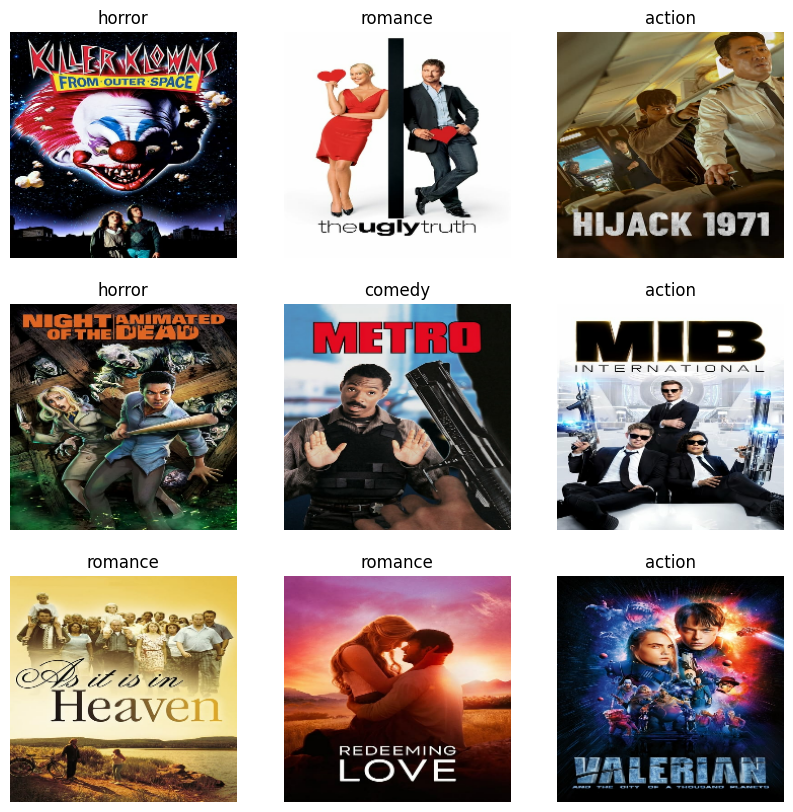

Training batches: 100
Validation batches: 25
Phase 1: Training with frozen base model (using mixup augmentation)...
Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.4364 - loss: 1.3105

100/100 ━━━━━━━━━━━━━━━━━━━━ 97s 487ms/step - accuracy: 0.4369 - loss: 1.3097 - val_accuracy: 0.5650 - val_loss: 1.0929
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6072 - loss: 1.0583

100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - accuracy: 0.6071 - loss: 1.0584 - val_accuracy: 0.5788 - val_loss: 1.0845
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.6282 - loss: 1.0010 - val_accuracy: 0.5800 - val_loss: 1.0893
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - accuracy: 0.6563 - loss: 0.9557 - val_accuracy: 0.5788 - val_loss: 1.0923
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.6785 - loss: 0.9170 - val_accuracy: 0.5813 - val_loss: 1.0962
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.7093 - loss: 0.8734 - val_accuracy: 0.5663 - val_loss: 1.1093
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.7310 - loss: 0.8379 - val_accuracy: 0.5688 - val_loss: 1.1309
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.7453 - loss: 0.8157 - val_accuracy: 0.5537 - val_loss: 1.1429
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.7708 - loss: 0.7901 - val_accurac

100/100 ━━━━━━━━━━━━━━━━━━━━ 88s 285ms/step - accuracy: 0.5628 - loss: 1.1046 - val_accuracy: 0.6137 - val_loss: 1.0744
Epoch 32/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 127ms/step - accuracy: 0.7439 - loss: 0.8213 - val_accuracy: 0.6025 - val_loss: 1.1178
Epoch 33/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 127ms/step - accuracy: 0.8376 - loss: 0.6972 - val_accuracy: 0.5738 - val_loss: 1.1778
Epoch 34/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - accuracy: 0.8809 - loss: 0.6172 - val_accuracy: 0.5700 - val_loss: 1.2404
Epoch 35/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.9091 - loss: 0.5641 - val_accuracy: 0.5562 - val_loss: 1.2931
Epoch 36/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.9244 - loss: 0.5353 - val_accuracy: 0.5587 - val_loss: 1.3324
Epoch 37/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.9525 - loss: 0.4949 - val_accuracy: 0.5650 - val_loss: 1.3600
Epoch 38/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - accuracy: 0.9469 - loss: 0.495

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"{len(gpus)} GPU(s) detected: {gpus}")
    except RuntimeError as e:
        print("GPU configuration error:", e)
else:
    print("No GPU detected.")

def load_and_split_dataset(data_dir, img_size=(224,224), batch_size=32, test_split=0.2):
    dataset = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        label_mode='int',
        image_size=img_size,
        batch_size=batch_size,
        shuffle=True
    )
    class_names = dataset.class_names
    print(f"Found {len(class_names)} classes: {class_names}")

    plt.figure(figsize=(10,10))
    for images, labels in dataset.take(1):
        for i in range(min(9, images.shape[0])):
            ax = plt.subplot(3,3,i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
    plt.show()

    total_batches = tf.data.experimental.cardinality(dataset).numpy()
    test_batches = int(total_batches * test_split)
    train_ds = dataset.skip(test_batches)
    val_ds = dataset.take(test_batches)
    print("Training batches:", tf.data.experimental.cardinality(train_ds).numpy())
    print("Validation batches:", tf.data.experimental.cardinality(val_ds).numpy())
    return train_ds, val_ds, class_names

def preprocess_images(x, y):
    """
    Preprocess images for EfficientNetB3:
      - Convert to float32.
      - Use EfficientNet's preprocess_input to scale pixel values.
    """
    x = tf.cast(x, tf.float32)
    x = tf.keras.applications.efficientnet.preprocess_input(x)
    return x, y

# Convert Labels to One-Hot (for validation)
def convert_to_one_hot(x, y, num_classes):
    y = tf.one_hot(y, depth=num_classes)
    return x, y

def mixup(images, labels, alpha=0.2, num_classes=4):

    batch_size = tf.shape(images)[0]
    lam = tf.cast(np.random.beta(alpha, alpha), tf.float32)
    indices = tf.random.shuffle(tf.range(batch_size))
    labels_one_hot = tf.one_hot(labels, depth=num_classes)
    mixed_images = lam * images + (1 - lam) * tf.gather(images, indices)
    mixed_labels = lam * labels_one_hot + (1 - lam) * tf.gather(labels_one_hot, indices)
    return mixed_images, mixed_labels

def apply_mixup(x, y, alpha=0.2, num_classes=4):
    return mixup(x, y, alpha, num_classes)

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2)
])

def build_model(input_shape=(224,224,3), num_classes=4):

    inputs = tf.keras.Input(shape=input_shape)
    x = inputs
    base_model = tf.keras.applications.EfficientNetB3(
        include_top=False,
        weights="imagenet",
        input_shape=input_shape
    )
    base_model.trainable = False
    x = base_model(x, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)
    model = tf.keras.Model(inputs, outputs)
    return model, base_model

def compile_model(model, initial_lr, total_steps):
    """
    Compiles the model with a cosine decay learning rate schedule and
    CategoricalCrossentropy with label smoothing.
    """
    lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
        initial_learning_rate=initial_lr,
        decay_steps=total_steps
    )
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=0.1)
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

# Training Function (Two-Phase Training)
def train_and_finetune(model, base_model, train_ds, val_ds, num_classes, epochs_phase1=30, epochs_phase2=20):
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)
    ]
    print("Phase 1: Training with frozen base model (using mixup augmentation)...")
    # Apply mixup on the training dataset (labels are still integer here)
    train_ds_mixup = train_ds.map(lambda x, y: apply_mixup(x, y, alpha=0.2, num_classes=num_classes),
                                  num_parallel_calls=tf.data.AUTOTUNE)
    history1 = model.fit(train_ds_mixup, validation_data=val_ds, epochs=epochs_phase1, callbacks=callbacks)

    # Phase 2: Fine-tuning
    base_model.trainable = True
    for layer in base_model.layers[:-100]:
        layer.trainable = False  # Fine-tune only the top 100 layers
    print("Phase 2: Fine-tuning with unfrozen top layers...")
    total_steps_phase2 = tf.data.experimental.cardinality(train_ds).numpy() * epochs_phase2
    compile_model(model, initial_lr=1e-4, total_steps=total_steps_phase2)
    history2 = model.fit(train_ds_mixup, validation_data=val_ds,
                         epochs=epochs_phase1 + epochs_phase2,
                         initial_epoch=epochs_phase1, callbacks=callbacks)
    return history1, history2

def evaluate_model(model, val_ds, class_names):
    """
    Evaluates the model using the validation dataset.
    For evaluation, we assume validation labels have been converted to one-hot.
    """
    y_true, y_pred = [], []
    for images, labels in val_ds:
        preds = model.predict(images)
        preds_cls = np.argmax(preds, axis=1)
        true_cls = np.argmax(labels.numpy(), axis=1)
        y_true.extend(true_cls)
        y_pred.extend(preds_cls)
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names))

def plot_history(history, title_prefix=""):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Val Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title(f"{title_prefix} Accuracy")

    plt.subplot(1,2,2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title(f"{title_prefix} Loss")
    plt.show()

if __name__ == '__main__':
    DATA_DIR = "../data/new_data"
    IMG_SIZE = (224,224)
    BATCH_SIZE = 32
    epochs_phase1 = 30
    epochs_phase2 = 20
    num_classes = 4
    train_ds, val_ds, class_names = load_and_split_dataset(DATA_DIR, img_size=IMG_SIZE, batch_size=BATCH_SIZE, test_split=0.2)

    train_ds = train_ds.map(preprocess_images, num_parallel_calls=tf.data.AUTOTUNE)
    val_ds = val_ds.map(preprocess_images, num_parallel_calls=tf.data.AUTOTUNE)

    # For training dataset: do NOT convert labels to one-hot (mixup will do it)
    # For validation dataset: convert labels to one-hot for loss calculation
    val_ds = val_ds.map(lambda x, y: convert_to_one_hot(x, y, num_classes), num_parallel_calls=tf.data.AUTOTUNE)

    train_ds = train_ds.cache().prefetch(tf.data.AUTOTUNE)
    val_ds = val_ds.cache().prefetch(tf.data.AUTOTUNE)

    model, base_model = build_model(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3), num_classes=num_classes)

    total_steps_phase1 = tf.data.experimental.cardinality(train_ds).numpy() * epochs_phase1
    compile_model(model, initial_lr=1e-3, total_steps=total_steps_phase1)

    history1, history2 = train_and_finetune(model, base_model, train_ds, val_ds,
                                            num_classes=num_classes,
                                            epochs_phase1=epochs_phase1, epochs_phase2=epochs_phase2)

    evaluate_model(model, val_ds, class_names)

    plot_history(history1, title_prefix="Phase 1")
    plot_history(history2, title_prefix="Phase 2")


In [ ]:
model.save('../data/processed/images/image_model.h5')

# Testing

In [ ]:
import tensorflow as tf
model=tf.keras.models.load_model('../data/processed/images/image_model.h5')

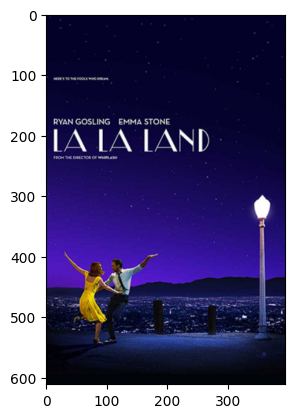

In [ ]:
import cv2
import matplotlib.pyplot as plt
test_input=cv2.imread('../temp/pic_lalaland.png')
rgb_img=cv2.cvtColor(test_input,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

In [ ]:
import joblib
label_encoder=joblib.load('../data/processed/text/label_encoder.pkl')

In [ ]:
import numpy as np
preprocessed_img=cv2.resize(rgb_img,(224,224))
y_pred=model.predict(np.expand_dims(preprocessed_img,axis=0))
label_encoder.inverse_transform(np.argmax(y_pred,axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


array(['romance'], dtype=object)